In [45]:
pip install -U imbalanced-learn

In [46]:
#import the required libraries
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pylab as plt
import seaborn as sns

plt.style.use('ggplot')

In [47]:
#Read the telecom customer dataset into a dataframe 
telecom_df = pd.read_csv("data.csv")

# Step 1: Data Understanding

In [48]:
#Check the number of rows and columns
telecom_df.shape

(7043, 21)

In [49]:
#preview the  first 5 rows of the dataset 
telecom_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [50]:
#Print a concise summary of a DataFrame
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [51]:
#check the basic statistics of the dataset. This shows only information for numeric values
telecom_df.describe()
#SeniorCitizen is diplayed as an integer but its in fact not an integer. its supposed to have values 'yes' and 'no'

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [52]:
#To include columns with datatype other than the ones stored as numerical 
telecom_df.describe(include = 'all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [53]:
#Print unique values in each of the column, except for customerID, tenure,  MonthlyCharges, and TotalCharges which have
#thousands of values that the screen wont accomodate
columns_unique = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines','InternetService',
                   'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                  'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

for column_name in columns_unique:
    unique_values = telecom_df[column_name].unique()
    print(f"Unique values in {column_name}:")
    for value in unique_values:
        print(value)
    print("---------------------------------------------------------------------")

Unique values in gender:
Female
Male
---------------------------------------------------------------------
Unique values in SeniorCitizen:
0
1
---------------------------------------------------------------------
Unique values in Partner:
Yes
No
---------------------------------------------------------------------
Unique values in Dependents:
No
Yes
---------------------------------------------------------------------
Unique values in PhoneService:
No
Yes
---------------------------------------------------------------------
Unique values in MultipleLines:
No phone service
No
Yes
---------------------------------------------------------------------
Unique values in InternetService:
DSL
Fiber optic
No
---------------------------------------------------------------------
Unique values in OnlineSecurity:
No
Yes
No internet service
---------------------------------------------------------------------
Unique values in OnlineBackup:
Yes
No
No internet service
---------------------------------

In [54]:
#Checking to know if ane columns has null value. 
telecom_df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Step 2: Data Preparation

In [55]:
#Check for duplicate  values in the dataframe. 
telecom_df.loc[telecom_df.duplicated(subset = ['customerID'])]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [56]:
#Customer ID is irrelevant to the analysis, so i am dropping the column
telecom_df=telecom_df.drop('customerID', axis= 1 )


In [57]:
#Checking where(in which)row ' ' exists in the TotalCharges column. 
#Because changing  the column to numeric brings error(ValueError: Unable to parse string " " at position 488)

telecom_df["TotalCharges"].isin([' ']).sum()

11

In [58]:
#Import SimpleImputer from Sklearn to impute value to the rows with ' ' in total charges column
from sklearn.impute import SimpleImputer
# Replace ' ' with NaN in the 'TotalCharges' column
telecom_df['TotalCharges'] = telecom_df['TotalCharges'].replace(' ', np.nan)
# Convert the column to float
telecom_df['TotalCharges'] = telecom_df['TotalCharges'].astype(float)

# Create a SimpleImputer to replace missing values with the mean
num_imputer = SimpleImputer(strategy='mean')
telecom_df['TotalCharges'] = num_imputer.fit_transform(telecom_df[['TotalCharges']])


In [59]:
#map the Senior Citizen column back to categorical values before normalising all categorical variables 
telecom_df["SeniorCitizen"]=telecom_df["SeniorCitizen"].map({0: "No", 1: "Yes"})
telecom_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [60]:
#Check the datatype of the Total charges coloumn 
telecom_df['TotalCharges'].dtypes

dtype('float64')

In [61]:
telecom_df["TotalCharges"].isin([' ']).sum()


0

In [62]:
#Dealing with columns with Yes, No and 'No internet service' values. 

#Replace No internet service with No
columns_to_map = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies' ]
for column in columns_to_map:
    telecom_df[column] = telecom_df[column].replace('No internet service', 'No')


In [63]:
#Replacing 'No phone service' with No
telecom_df['MultipleLines']=telecom_df['MultipleLines'].replace('No phone service', 'No')

# Data Visualization
- use Matplotlib and seaborn libraries to show graphical and  statistical information about different columns of dataset

Univariate Analysis

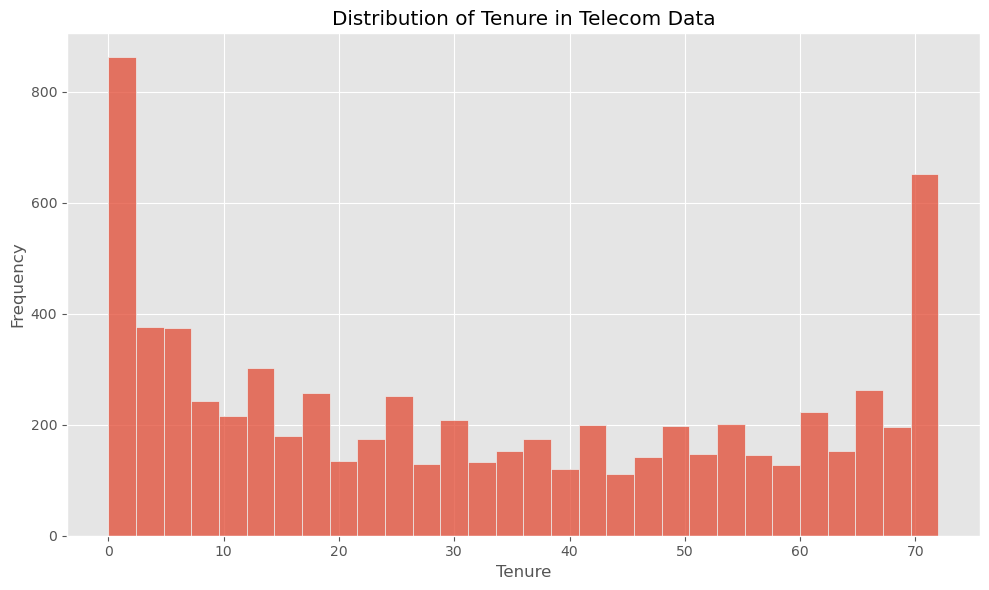

In [64]:
# Create a histogram for the Tenure column
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size as needed
sns.histplot(telecom_df['tenure'], kde=False, bins=30)  # 'bins' determines the number of bins

# Adding labels and title for clarity
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.title('Distribution of Tenure in Telecom Data')

# Show the plot
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
plt.show()

<Axes: xlabel='count', ylabel='PaymentMethod'>

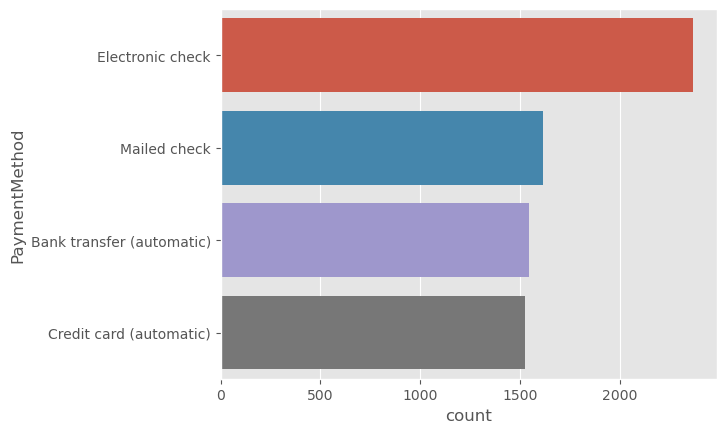

In [65]:
#the barplot of the payment method available for the telecom customers
sns.countplot(data=telecom_df, y='PaymentMethod')

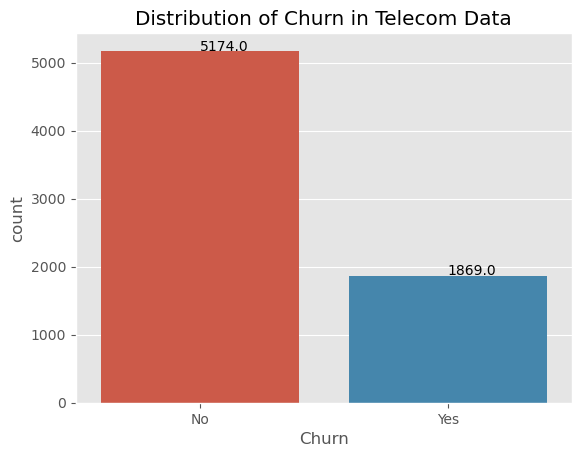

In [66]:
# Create the countplot for the distribution of Churn 


ax = sns.countplot(data=telecom_df, x='Churn')
# Annotate each bar with the count
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.4, p.get_height() + 5))

plt.title('Distribution of Churn in Telecom Data')
plt.show()

Bivariate and MultiVariate Visualization

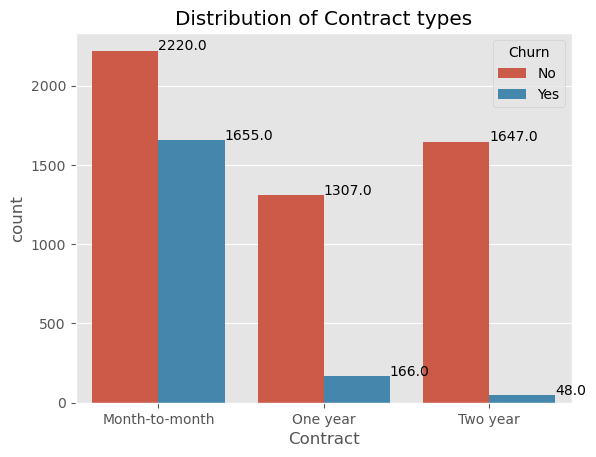

In [67]:
# Plot the contract types available for the telecom customers 
ax = sns.countplot(data=telecom_df, x='Contract', hue = 'Churn')
# Annotate each bar with the count
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.4, p.get_height() + 5))

plt.title('Distribution of Contract types')
plt.show()

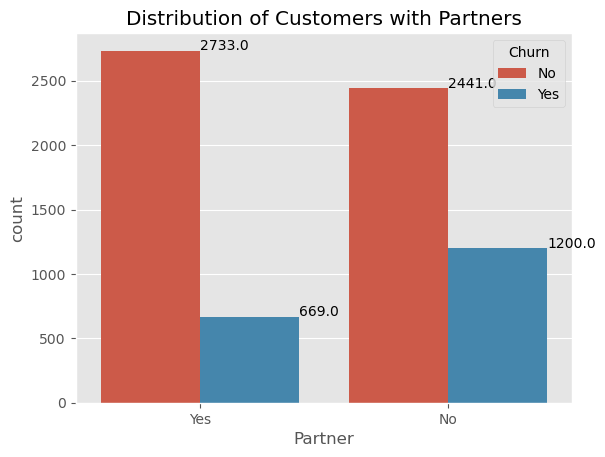

In [68]:
# Plot the Distribution of Customers with Partners

ax = sns.countplot(data=telecom_df, x='Partner', hue = 'Churn')
# Annotate each bar with the count
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.4, p.get_height() + 5))

plt.title('Distribution of Customers with Partners')
plt.show()

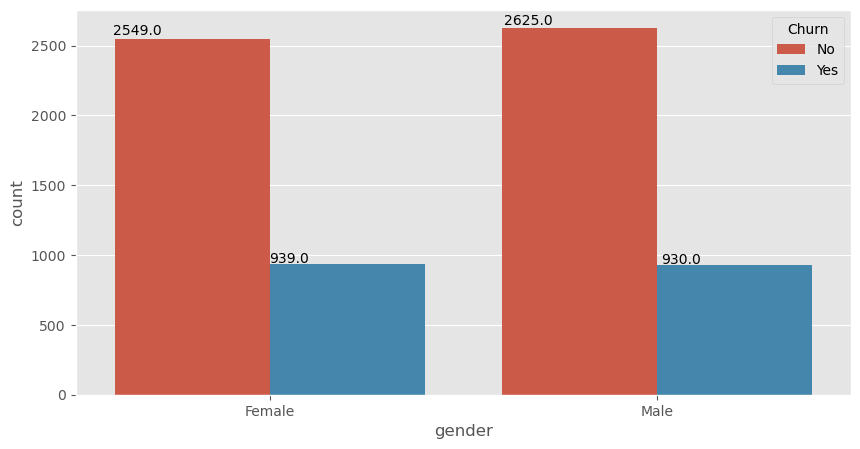

In [69]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x = "gender", hue = "Churn", data = telecom_df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
#plt.xticks(rotation = 90)
plt.show()

C:\Users\97450\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


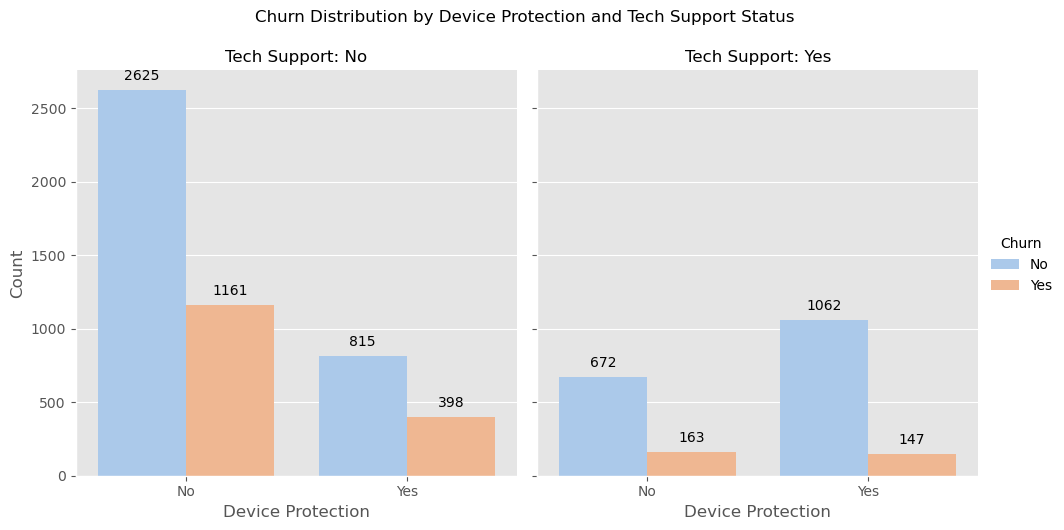

In [70]:
# Create a catplot
g = sns.catplot(
    data=telecom_df, 
    kind="count", 
    x="DeviceProtection", 
    hue="Churn", 
    col="TechSupport", 
    height=5, 
    aspect=1, 
    palette="pastel"
)

# Loop through each subplot (facet) in the FacetGrid
for ax in g.axes.flat:
    # Annotate each bar (patch) in the subplot
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 10), 
                    textcoords = 'offset points')

# Set titles and labels
g.fig.suptitle('Churn Distribution by Device Protection and Tech Support Status', y=1.05)
g.set_axis_labels("Device Protection", "Count")
g.set_titles("Tech Support: {col_name}")

# Show the plot
plt.show()


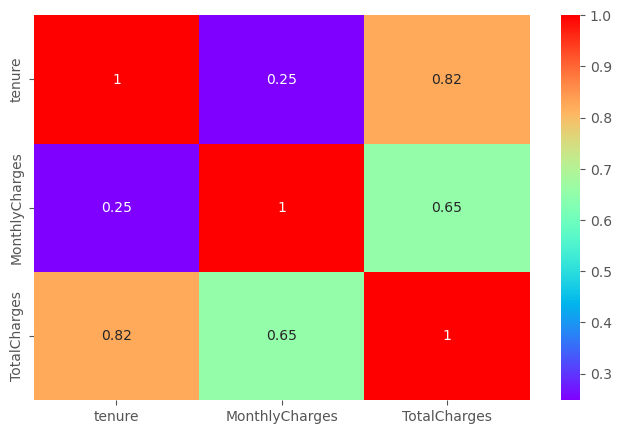

In [71]:
plt.figure(figsize = (8,5))
sns.heatmap(telecom_df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr(), annot = True, cmap="rainbow")
plt.show()

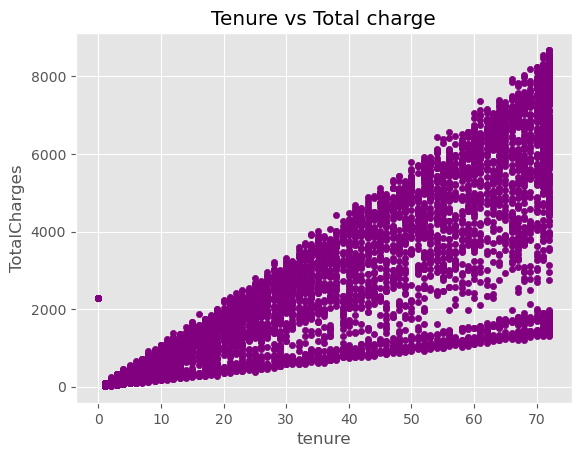

In [72]:
#Plotting the tenure and the total charges of customers 
telecom_df.plot(kind ='scatter', 
                  x = 'tenure',
                  y = 'TotalCharges',
                  title = 'Tenure vs Total charge',
                  color = 'purple')
plt.show()

C:\Users\97450\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


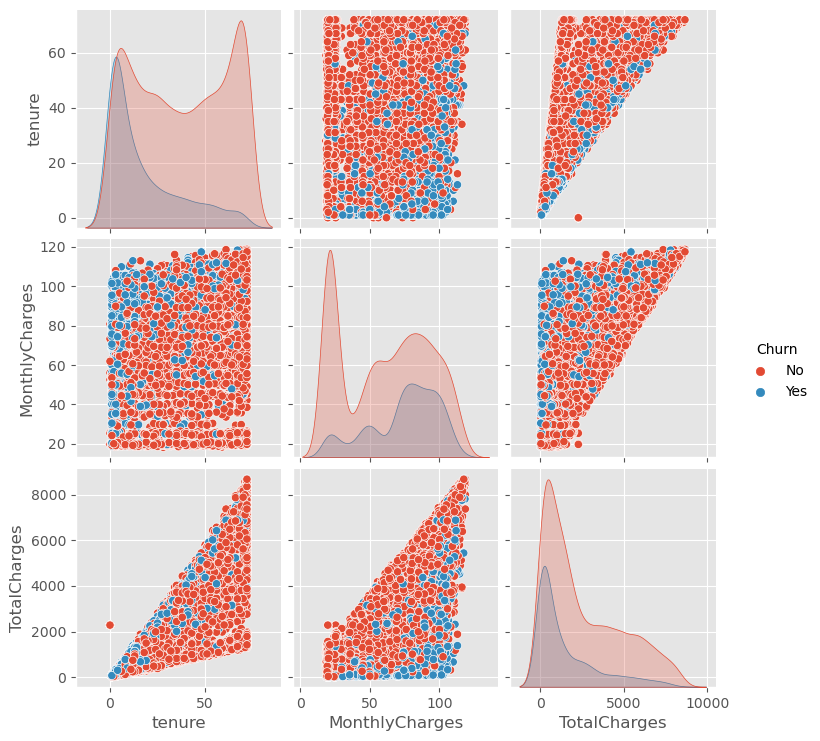

In [73]:
sns.pairplot(telecom_df, vars =['tenure', 'MonthlyCharges', 'TotalCharges'],
             hue = 'Churn')
plt.show()

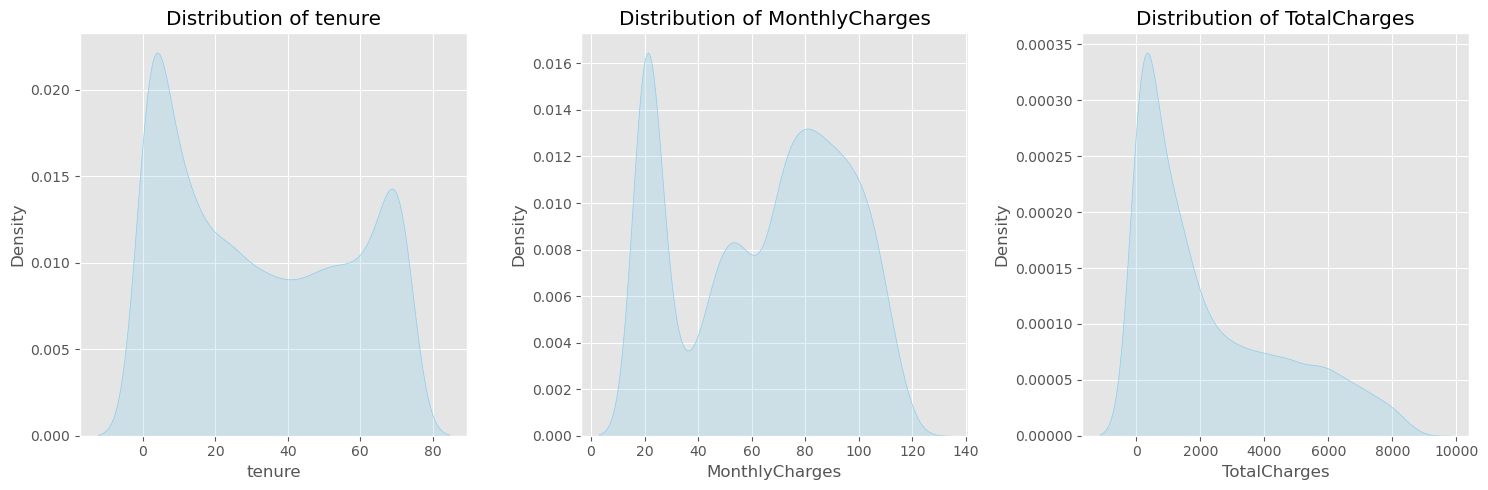

In [74]:
# Variables to visualize
variables = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Set up the figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=len(variables), figsize=(15, 5))

# Creating kernel density plots for each variable
for i, variable in enumerate(variables):
    sns.kdeplot(telecom_df[variable], ax=axes[i], fill=True, color='skyblue')
    axes[i].set_title(f'Distribution of {variable}')

# Adjust layout
plt.tight_layout()
plt.show()

# Dealing with Categorical variables

In [75]:
telecom_df1 = telecom_df.copy()

In [76]:
#All together
from sklearn import preprocessing 
#Target variable, it just uses the ordinal encoder 

enc = preprocessing.OrdinalEncoder()
telecom_df1['Churn'] = enc.fit_transform(telecom_df1['Churn'].values.reshape(-1,1))

#input variables one hot encoding 
enc = preprocessing.OneHotEncoder(drop ='first')
onehots = enc.fit_transform(telecom_df1[['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 
                            'OnlineBackup','OnlineSecurity', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                            'StreamingMovies', 'MultipleLines', 'gender','InternetService', 'Contract', 'PaymentMethod' ]]).toarray()

#creating the new df

cols = []

for i in enc.categories_:
    i = np.delete(i,0)
    cols.extend(i)
telecom_df1 =telecom_df1.join(pd.DataFrame(onehots, columns = cols))


telecom_df1 = telecom_df1.drop(['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 
                                    'OnlineBackup','OnlineSecurity', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                                    'StreamingMovies',  'MultipleLines', 'gender','InternetService', 'Contract', 
                                    'PaymentMethod' ], axis = 1)
telecom_df1

,tenure,MonthlyCharges,TotalCharges,Churn,Yes,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Male,Fiber optic,No,One year,Two year,Credit card (automatic),Electronic check,Mailed check
0,1,29.85,29.85,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,34,56.95,1889.50,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,2,53.85,108.15,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,45,42.30,1840.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2,70.70,151.65,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,1990.50,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7039,72,103.20,7362.90,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
7040,11,29.60,346.45,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7041,4,74.40,306.60,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


# Splitting the data

In [77]:
X= telecom_df1.drop('Churn', axis = 1)
y =telecom_df1['Churn']

In [78]:
#Splitting the dataset into Training and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

<Axes: xlabel='Churn', ylabel='count'>

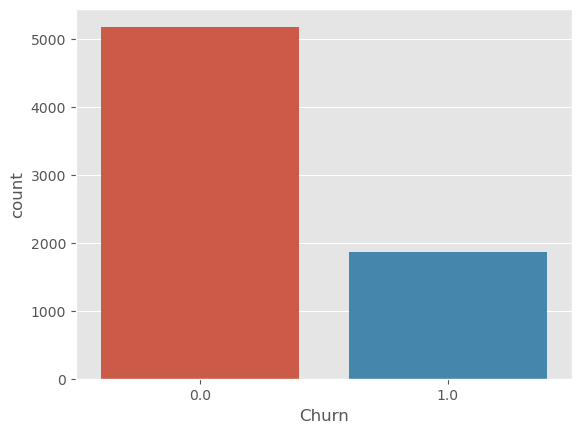

In [79]:
sns.countplot(data = telecom_df1, x =telecom_df1['Churn'])

# Scaling the data

In [80]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_s= sc.fit_transform(X_train)
X_test_s = sc.transform(X_test)

#  Addressing Class Imbalance 

<Axes: xlabel='Churn', ylabel='count'>

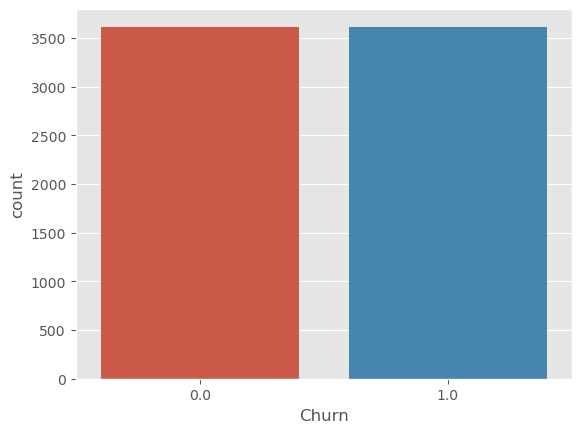

In [81]:
#we can also implement SMOTE as an alternative to random over sampling:

from imblearn.over_sampling import SMOTE
resampler = SMOTE(random_state = 0)
X_train_smote, y_train_smote= resampler.fit_resample(X_train_s, y_train)
sns.countplot(x = y_train_smote)

 # Using VarianceThreshold to remove low or no variance features

In [82]:
from sklearn.feature_selection import VarianceThreshold 
variance_selector = VarianceThreshold(threshold=0)
X_train_fs = variance_selector.fit_transform(X_train_smote) 
X_test_fs = variance_selector.transform(X_test_s)
print(f"{X_train.shape[1]-X_train_fs.shape[1]} features have been removed, {X_train_fs.shape[1]} features remain")

0 features have been removed, 23 features remain


# Train Random Forest model

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, f1_score

In [84]:
#Fitting RandomForest model to the Training set

rf_selectedfeatures = RandomForestClassifier() 
rf_selectedfeatures.fit(X_train_fs, y_train_smote)

RandomForestClassifier()

# Evaluate the model

In [93]:
from sklearn import metrics
y_pred = rf_selectedfeatures.predict(X_test_fs)
acc = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)
print('accuracy:%.2f\n\n'%(acc))
print('f1_score:%.2f\n\n'%(f1_score))
cm=metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm, '\n\n')
print('--------------------------------')
result= metrics.classification_report(y_test, y_pred)

print('Classification Report: \n')
print(result)

accuracy:0.77


f1_score:0.57


Confusion Matrix:
[[1310  250]
 [ 230  323]] 


--------------------------------
Classification Report: 

              precision    recall  f1-score   support

         0.0       0.85      0.84      0.85      1560
         1.0       0.56      0.58      0.57       553

    accuracy                           0.77      2113
   macro avg       0.71      0.71      0.71      2113
weighted avg       0.78      0.77      0.77      2113



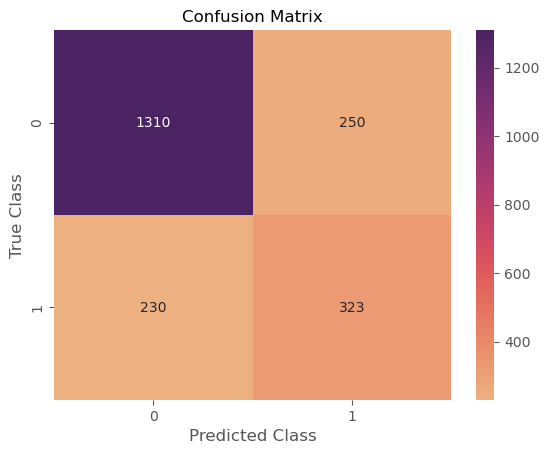

In [86]:
ax = sns.heatmap(cm, cmap = 'flare', annot = True, fmt = 'd')

plt.xlabel("Predicted Class", fontsize = 12)
plt.ylabel("True Class", fontsize = 12)
plt.title("Confusion Matrix", fontsize = 12)

plt.show()

# Hyper Parameter Tuning 

In [97]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score as calculate_f1_score

rf= RandomForestClassifier(random_state=42)  # Set a fixed random state
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
    }

# Use StratifiedKFold for consistent data splits
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf_selectedfeatures, param_grid=param_grid, cv=cv, n_jobs=-1, verbose=2,
                           scoring='f1')

# Fit the grid search to the data
grid_search.fit(X_train_fs, y_train_smote)


# Best parameters
print("Best parameters found: ", grid_search.best_params_)

# Best model
best_model = grid_search.best_estimator_


y_pred_t = best_model.predict(X_test_fs)
print("F1-SCORE on test set: ", calculate_f1_score(y_test, y_pred_t))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
F1-SCORE on test set:  0.5847234416154522


Accuracy Score: 77.43%
Precision Score: 56.44%


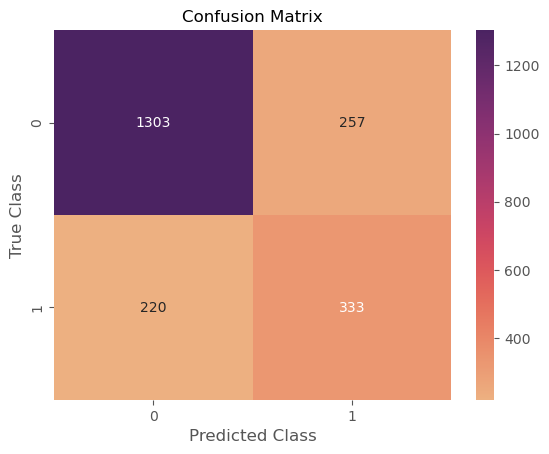

In [88]:
# Make predictions on the test data

print(f"Accuracy Score: {accuracy_score(y_test,y_pred_t)*100:.2f}%") 
print(f"Precision Score: {precision_score(y_test,y_pred_t)*100:.2f}%") 
cm = confusion_matrix(y_test,y_pred_t)
ax = sns.heatmap(cm, cmap='flare',annot=True, fmt='d')
plt.xlabel("Predicted Class",fontsize=12) 
plt.ylabel("True Class",fontsize=12) 
plt.title("Confusion Matrix",fontsize=12)
plt.show()

In [89]:
print(classification_report(y_test, y_pred_t))

              precision    recall  f1-score   support

         0.0       0.86      0.84      0.85      1560
         1.0       0.56      0.60      0.58       553

    accuracy                           0.77      2113
   macro avg       0.71      0.72      0.71      2113
weighted avg       0.78      0.77      0.78      2113

